# Modeling Burned Area by Forest Fires

We will be now proceding with our goal of projecting the area burned by forest fires considering strongly relevant meterological components. Ideally we can identify a model which can accuratly portray our forest fires data and the parameters that can considerably have greater impact in the areas that are devastated by forest fires. We would like to understand in which stance this region is found and how it can be further impacted by the changing of matereological matters which have been of increasing concern due to climate change.

Our next step then will be to test out models.

We will be starting by importating our needed packages and libraries.

In [892]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Reading Data

We will now be reading our explored, wrangled and pre processed data. We will also review our columns and dtypes to refresh our memories about the data set changes

In [893]:
# Loading the data
datafile = pd.read_csv('../data/processed/processed_fires.csv')

# Checking our data tyes and the size of our dataframe
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FFMC       292 non-null    float64
 1   DMC        292 non-null    float64
 2   DC         292 non-null    float64
 3   ISI        292 non-null    float64
 4   temp       292 non-null    float64
 5   RH         292 non-null    int64  
 6   wind       292 non-null    float64
 7   rain       292 non-null    float64
 8   area       292 non-null    float64
 9   month_apr  292 non-null    bool   
 10  month_aug  292 non-null    bool   
 11  month_dec  292 non-null    bool   
 12  month_feb  292 non-null    bool   
 13  month_jan  292 non-null    bool   
 14  month_jul  292 non-null    bool   
 15  month_jun  292 non-null    bool   
 16  month_mar  292 non-null    bool   
 17  month_may  292 non-null    bool   
 18  month_nov  292 non-null    bool   
 19  month_oct  292 non-null    bool   
 20  month_sep 

In [894]:
datafile.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,False,...,False,False,False,False,False,False,False,False,True,False
1,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,False,...,False,False,False,False,False,False,False,False,True,False
2,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
3,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,False
4,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,False,...,False,False,False,False,False,False,False,False,False,True


# Linear Regression Modeling

Next step will be to define our targeted dependent variable and our independent variables. We will be using the Linear Regression function and also the StandardScaler function to standardize our values since all independent variables have different metrics from each other

In [895]:
x = datafile.drop('area', axis= 1)

y = datafile['area']

In [896]:
reg = LinearRegression()
sc = StandardScaler()

x = sc.fit_transform(x)

In [897]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Fit the model to the training data
reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 81.56626421961893
R-squared: 0.05588399328978311


Our current linear modeling demonstrates a low R-Squared of  0.05588399328978311  and Mean Squared Error: 81.56626421961893 leading us to consider a revaluation of the model. Let's take a look at a scatter plot representation of the predicted values and actual values to understand why that might be

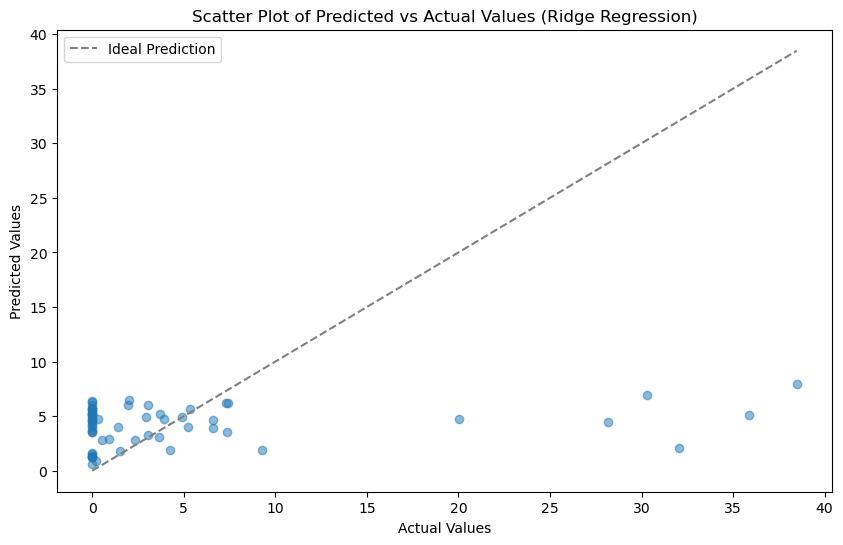

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray', label='Ideal Prediction')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()


One hypothesis we might raise is the possibility of our data set having too much noise, making it harder to predict values in a linear regression model. If we turn back to our Data Exploration we can see a stronger correlation between area, rain and temperature. We will then attempt to redefine our independent variables restricting to temperature and rain while we keep our target.

In [ ]:
x = datafile[["temp", "rain"]]
y = datafile["area"]

In [ ]:
reg = LinearRegression()

In [ ]:
sc = StandardScaler()
x = sc.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Fit the model to the training data
reg.fit(x_train, y_train)

# Make predictions on the test data
y_pred = reg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 84.91366832949
R-squared: 0.017138344812520967


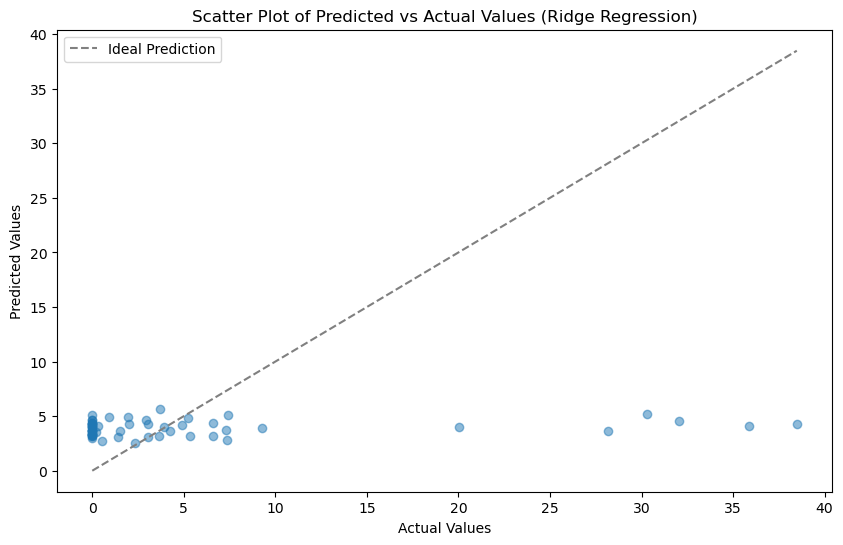

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray', label='Ideal Prediction')
plt.title('Scatter Plot of Predicted vs Actual Values (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()


As we can observe from this testing even with stronger correlations found during the data exploration, when we utilize only temp and rain as our independent variables we still get a weak R2 score that raising the hypothesis that the variables do not have a linear correlation with the area burned